In [1]:
import os,sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def delimited_lempel_ziv_complexity(sequence, delimiter):
   
    sub_strings = set()
    n = len(sequence)

    ind = 0
    inc = 1
    while True:
        if ind + inc > len(sequence):
            break
        sub_str = sequence[ind : ind + inc]
        if delimiter in sub_str: 
            ind = ind + 1
            inc = 1
        else:
            if sub_str in sub_strings:
                inc += 1
       
            else:
                sub_strings.add(sub_str)
                ind = ind + 1
                inc = 1
    return len(sub_strings)





In [31]:
path = "C:/Users/leonn/Documents/Progetti/TesiUnicam/Data/Output"
target = "C:/Users/leonn/Documents/Progetti/TesiUnicam/Data/Plot/"

#del path ricava una lista di tutti i file e directory
listComuni = os.listdir(path)

#if not os.path.exists(path+"/Output")
#os.mkdir(path+"/Plot")
for comune in listComuni:
    os.mkdir(target+comune)

In [32]:
import os
import sys

#inserire il path dell'output
path = "C:/Users/leonn/Documents/Progetti/TesiUnicam/Data/Output"

#inserire il path target dove salvare i plot
target = "C:/Users/leonn/Documents/Progetti/TesiUnicam/Data/Plot/"


filepaths = [path]
arrayfiles = []
for root,dir,files in os.walk(os.path.normpath(path), topdown=True):
    if len(files) > 0:
        for file in files:
            filepaths.append(os.path.join(root,file).replace("\\","/"))
            arrayfiles.append(file)
filepaths.remove("C:/Users/leonn/Documents/Progetti/TesiUnicam/Data/Output")
print(len(filepaths))

153


In [33]:
count = 0
for log in filepaths:
    df=pd.read_csv(log, encoding='ISO-8859-1', on_bad_lines='skip')
    
    log = log.replace('C:/Users/leonn/Documents/Progetti/TesiUnicam/Data/Output/','')
    log = log.replace('.csv','')

    print(log)
    df1 = df[['id istanza','renamed']]
    
    df2=df1.groupby("id istanza")["renamed"].sum().reset_index()
    vec1 = []
    for i in range(len(df2)):
        join='*'.join(df2.loc[0:i,'renamed'])
        unique_complexity=delimited_lempel_ziv_complexity(join, "*")
        vec1.append(unique_complexity)
    
    import matplotlib.pyplot as plt
    plt.plot(vec1)
    plt.title(log)

    


    plt.savefig(target+log+".png")
    count = count + 1
    

    plt.clf()

caponago/Flusso di stampa
caponago/Postalizzazione standard
caponago/SottoProcessoFinePubblicazione
caponago/SottoProcessoInizioPubblicazione
caponago/SottoProcessoPubblicazione
caponago/SottoProcessoStampa
capralba/aire_fin
capralba/annotazione_auto
capralba/ann_divorzio_nas
capralba/apr_fin_2012
capralba/apr_fin_2012_estero
capralba/apr_ini_2012
capralba/cambio_abit_apr_2012
capralba/cambio_aire
capralba/canc_short
capralba/decreto
capralba/dichiarazione_cdf
capralba/FTE_GEN
capralba/FTE_NOT_EC_ACC
capralba/FTE_NOT_EC_RIF
capralba/FTE_NOT_SCA
capralba/FT_ELE_SDI
capralba/iter impegno
capralba/iter tecnico
capralba/iter_tecnico
capralba/iter_tec_cont
capralba/ordinanza
capralba/singolo_accertamento
capralba/sottoprocesso_valutazione_rs
capralba/stato_civile
carisolo/aire_fin
carisolo/apr_fin_2012
carisolo/apr_fin_2012_estero
carisolo/apr_ini_2012
carisolo/cambio_abit_apr_2012
carisolo/cambio_aire
carisolo/canc_short
carisolo/singolo_accertamento
carisolo/stato_civile
Marsala/Atti Liqu

In [36]:
#df1

Text(0.5, 1.0, 'plot')

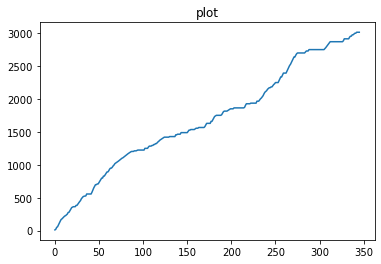